## A. Perkenalan

Nama : satrio Tri Nugroho

Kelas : HCK-021

Link Dataset : https://www.kaggle.com/datasets/asaniczka/amazon-kindle-books-dataset-2023-130k-books/data

Link Dashboard : https://public.tableau.com/views/Tableau_satrio/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## B. Identifikasi Masalah

### Latar Belakang

Sebagai seorang data analyst di industri penerbitan, saya bertugas untuk mengungkap wawasan yang dapat membantu penerbit memahami kebutuhan dan preferensi pembaca. Dalam konteks persaingan yang semakin ketat, penting bagi penerbit untuk menganalisis faktor-faktor yang memengaruhi keputusan pembelian, ulasan buku. Dengan memanfaatkan data yang tersedia, saya berupaya mengidentifikasi tren dalam perilaku pembaca, sehingga penerbit dapat mengoptimalkan kualitas buku dan strategi pemasaran mereka. Tujuan akhir dari analisis ini adalah untuk meningkatkan keterlibatan pembaca dan mendorong penjualan, memastikan bahwa penerbit tetap relevan dalam pasar yang dinamis ini.

### Smart Analysis

**Spesifik** : Menganalisis seberapa besar dampak tag premium seperti GoodReads Choice, Editor's Pick, dan BestSeller terhadap jumlah review dan genre buku untuk melihat seberapa efektif tag tersebut dalam menarik perhatian pembaca dan meningkatkan keterlibatan mereka dengan konten buku.

**Measureable** : Meningkatkan keterlibatan pembaca sebesar 10% dengan memfokuskan pada peningkatan jumlah jumlah review selama 12 bulan ke depan.

**Achievable** : Melakukan analisis dampak tag premium terhadap data jumlah review untuk mengidentifikasi buku dengan keterlibatan tinggi

**Relevant** : Tujuan ini mendukung prioritas penerbit untuk memahami tren pembaca, meningkatkan kualitas buku, serta mengarahkan kampanye pemasaran yang lebih efektif. Dengan meningkatkan keterlibatan pembaca, penerbit dapat menarik audiens yang lebih luas dan memperkuat posisi di pasar.

**Time-Bound** :  Implementasi strategi berdasarkan hasil analisis akan dilakukan dalam waktu 1 tahun. Evaluasi secara berkala akan dilakukan setiap 3 bulan untuk menilai kemajuan dan melakukan penyesuaian jika diperlukan.

User : Penerbit

### Problem Breakdown

**Penjabaran Masalah**

1. Bagaimana distribusi jumlah review untuk setiap tag? (Deskriptif)

2. Apakah terdapat korelasi antara tag dan jumlah review? (Inferensial/ANOVA)

3. Genre mana yang paling diminati berdasarkan jumlah review di setiap tag? (Visualisasi/Bar)

4. Tag mana yang paling berpengaruh berdasarkan jumlah review? (Visualisasi/Bar)

5. Genre mana yang memiliki jumlah review terbanyak di setiap kategori tag (Non-Tag, BestSeller, GoodReads Choice, Editor's Pick)? (Visualisasi/Bar)

6. Bagaimana tren jumlah review untuk setiap tag? (Visualisasi/Line)



## C. Data Loading

### 1. Read Data from csv to dataframe

In [377]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Read the CSV file into a DataFrame
df = pd.read_csv('kindle_data-v2.csv')

Berikut adalah data loading dari csv. dan import library yang dibutuhkan untuk analysis ini

Untuk melakukan analisis yang lebih relevan saya menggunakan data ebook untuk 10 tahun terakhir dengan data publishdate yang lengkap

In [378]:
# Pastikan kolom 'publishedDate' dalam format datetime
df['publishedDate'] = pd.to_datetime(df['publishedDate'])

# Filter data untuk tahun 2018 hingga 2023
df = df[(df['publishedDate'].dt.year >= 2013) & (df['publishedDate'].dt.year <= 2023)]

# Hitung jumlah data yang terfilter
count_filtered_data = filtered_data.shape[0]

print(f'Jumlah data dengan publishedDate antara 2013 dan 2023: {count_filtered_data}')


Jumlah data dengan publishedDate antara 2013 dan 2023: 69891


In [380]:
df.describe()

,stars,reviews,price,category_id,publishedDate
count,69891.000000,69891.000000,69891.000000,69891.000000,69891
mean,4.365146,646.951525,19.093639,15.759683,2020-01-24 11:04:43.864875264
min,0.000000,0.000000,0.000000,1.000000,2013-01-01 00:00:00
25%,4.400000,0.000000,7.990000,9.000000,2017-11-24 00:00:00
50%,4.600000,0.000000,11.990000,15.000000,2020-10-06 00:00:00
75%,4.700000,133.000000,17.990000,24.000000,2022-10-01 00:00:00
max,5.000000,618227.000000,682.000000,31.000000,2023-12-05 00:00:00
std,0.876664,5604.943028,27.052503,8.509891,NaN


### 2. Data Exploration

#### Data Summary

##### 1. Column And Datatype Handling

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

**Insight dan Rencana Tindakan Berdasarkan df.info()**

Setelah melakukan analisis awal terhadap dataset eBook di Amazon, saya menemukan beberapa temuan penting yang memerlukan tindakan selanjutnya:

1. **Penghapusan Kolom yang Tidak Relevan**:
   - **asin**: Kolom ini tidak diperlukan untuk analisis lebih lanjut.
   - **imgurl**: Informasi gambar tidak relevan dalam konteks analisis ini.
   - **producturl**: Tautan produk tidak diperlukan untuk tujuan analisis data.
   - **category_id**: Kolom ini redundant karena informasi yang sama sudah tersedia di kolom **`category_name`**.

2. **Perbaikan Tipe Data**:
   - Kolom **`publishedDate`** saat ini memiliki tipe data `object`, yang tidak sesuai untuk analisis waktu. Saya akan mengonversi kolom ini menjadi tipe **`datetime`** untuk memudahkan analisis terkait publikasi buku.

Langkah-langkah ini akan membantu dalam memastikan bahwa dataset yang digunakan untuk analisis selanjutnya lebih bersih dan terfokus pada informasi yang relevan, sehingga analisis dapat dilakukan dengan lebih efektif.


##### 2. Describe

In [262]:
df[['stars', 'reviews', 'price']].describe()

,stars,reviews,price
count,133102.000000,133102.000000,133102.000000
mean,4.404090,887.375779,15.134127
std,0.745646,5104.878777,22.254986
min,0.000000,0.000000,0.000000
25%,4.400000,0.000000,4.990000
50%,4.500000,4.000000,9.990000
75%,4.700000,365.000000,14.990000
max,5.000000,618227.000000,682.000000


Berdasarkan hasil analisis deskriptif pada kolom **`stars`**, **`reviews`**, dan **`price`**, berikut adalah beberapa temuan dan tindakan yang akan dilakukan:

1. **Kolom `stars`**:
   - **Rata-rata**: 4.40, menunjukkan bahwa sebagian besar eBook memiliki rating yang baik.
   - **Min dan Max**: Rentang rating dari 0.0 hingga 5.0, dengan rating terendah 0.0 yang mungkin menunjukkan eBook dengan review yang sangat buruk atau tidak ada rating sama sekali.
   - **Distribusi**: Dengan standar deviasi (std) 0.75, terdapat variasi yang cukup kecil di sekitar rata-rata, menunjukkan bahwa sebagian besar rating cenderung berkumpul di sekitar nilai 4.4.

   Tindakan:
   - Menganalisis lebih lanjut eBook yang memiliki rating 0.0 untuk menentukan apakah ada kesalahan dalam data atau jika eBook tersebut memang tidak layak untuk dinilai.

2. **Kolom `reviews`**:
   - **Rata-rata**: 887.38, menunjukkan bahwa banyak eBook memiliki jumlah ulasan yang cukup tinggi.
   - **Min dan Max**: Rentang dari 0 hingga 618227, dengan outlier yang sangat signifikan di 618227, menunjukkan ada eBook yang memiliki jumlah ulasan yang ekstrem.
   - **Distribusi**: Standar deviasi yang tinggi (5104.88) menunjukkan variasi yang besar dalam jumlah ulasan.

   Tindakan:
   - Mengidentifikasi dan menganalisis eBook dengan jumlah ulasan ekstrem (outlier) untuk memahami apakah ini merupakan hasil dari praktik marketing yang agresif atau karena eBook tersebut memang sangat populer.

3. **Kolom `price`**:
   - **Rata-rata**: 15.13, menunjukkan harga rata-rata eBook.
   - **Min dan Max**: Rentang dari 0.0 hingga 682.0, dengan beberapa eBook yang dijual dengan harga sangat tinggi, yang bisa jadi outlier.
   - **Distribusi**: Standar deviasi 22.25 menunjukkan bahwa harga eBook bervariasi cukup luas.

   Tindakan:
   - Memeriksa eBook dengan harga 0.0 untuk memastikan tidak ada kesalahan dalam data dan mengidentifikasi eBook dengan harga tinggi untuk menganalisis apakah harga tersebut berbanding lurus dengan rating dan jumlah ulasan.

Dengan langkah-langkah ini, analisis dapat difokuskan pada pemahaman lebih mendalam mengenai faktor-faktor yang mempengaruhi rating, ulasan, dan harga eBook di Amazon, sehingga dapat memberikan insight berharga bagi penerbit.


#### Check Missing value

In [263]:
df.isnull().sum()

title                   0
author                 82
soldBy               4919
reviews                 0
price                   0
isBestSeller            0
isEditorsPick           0
isGoodReadsChoice       0
publishedDate           0
category_name           0
tag                     0
dtype: int64

In [264]:
# Hitung jumlah missing values pada kolom 'publishedDate'
missing_values_count = df['soldBy'].isnull().sum()

# Hitung total jumlah entri dalam dataset
total_entries = len(df)

# Hitung proporsi missing values sebagai persentase
missing_proportion = (missing_values_count / total_entries) * 100

# Tampilkan hasil
print(f"Jumlah missing values pada 'soldBy': {missing_values_count}")
print(f"Total entri dalam dataset: {total_entries}")
print(f"Proporsi missing values: {missing_proportion:.2f}%")


Jumlah missing values pada 'soldBy': 9233
Total entri dalam dataset: 133102
Proporsi missing values: 6.94%


Dari analisis missing values pada kolom `soldBy`, saya menemukan bahwa proporsi missing values adalah sekitar **6.94%** dari total dataset. Mengingat proporsi ini masih dalam rentang yang wajar dan tidak terlalu besar, saya memutuskan untuk **menghapuss entri yang memiliki missing values** pada kolom ini.

Langkah-langkah yang akan diambil adalah sebagai berikut:

1. **Menghapus Entri Missing**: Dengan menghapus entri yang tidak memiliki informasi pada kolom `soldBy`, saya dapat memastikan bahwa analisis yang dilakukan tidak terganggu oleh data yang hilang.
  
2. **Mempertahankan Kualitas Data**: Menghapus missing values membantu menjaga kualitas data dan memastikan bahwa analisis dilakukan pada data yang lengkap dan relevan.

Dengan langkah ini, saya berharap dapat mendapatkan insight yang lebih jelas dan dapat diandalkan dari dataset.


In [265]:
# Hitung jumlah missing values pada kolom 'publishedDate'
missing_values_count = df['author'].isnull().sum()

# Hitung total jumlah entri dalam dataset
total_entries = len(df)

# Hitung proporsi missing values sebagai persentase
missing_proportion = (missing_values_count / total_entries) * 100

# Tampilkan hasil
print(f"Jumlah missing values pada 'author': {missing_values_count}")
print(f"Total entri dalam dataset: {total_entries}")
print(f"Proporsi missing values: {missing_proportion:.2f}%")


Jumlah missing values pada 'author': 425
Total entri dalam dataset: 133102
Proporsi missing values: 0.32%


Dari analisis missing values pada kolom `author`, saya menemukan bahwa jumlah missing values adalah **425**, yang merupakan sekitar **0.32%** dari total dataset. Mengingat proporsi missing values yang sangat kecil ini, saya memutuskan untuk **menghapus entri yang memiliki missing values** pada kolom ini.

Langkah-langkah yang akan diambil adalah sebagai berikut:

1. **Menghapus Entri Missing**: Menghapus entri yang tidak memiliki informasi pada kolom `author` akan membantu memastikan analisis yang dilakukan tidak terganggu oleh data yang hilang.

2. **Menjaga Kualitas Data**: Dengan menghapus entri yang hilang, saya dapat memastikan bahwa data yang dianalisis adalah data yang lebih lengkap dan dapat diandalkan.

Dengan langkah ini, saya berharap analisis yang dilakukan dapat memberikan insight yang lebih akurat dan berguna dari dataset.


In [266]:
# Hitung jumlah missing values pada kolom 'publishedDate'
missing_values_count = df['publishedDate'].isnull().sum()

# Hitung total jumlah entri dalam dataset
total_entries = len(df)

# Hitung proporsi missing values sebagai persentase
missing_proportion = (missing_values_count / total_entries) * 100

# Tampilkan hasil
print(f"Jumlah missing values pada 'publishedDate': {missing_values_count}")
print(f"Total entri dalam dataset: {total_entries}")
print(f"Proporsi missing values: {missing_proportion:.2f}%")


Jumlah missing values pada 'publishedDate': 49016
Total entri dalam dataset: 133102
Proporsi missing values: 36.83%


Menghadapi situasi di mana proporsi missing values pada kolom `publishedDate` mencapai sekitar **36.83%**, dan dengan pemahaman yang masih terbatas tentang teknik pengisian missing values, bijaknya adalah mengambil langkah yang lebih sederhana dan aman. Dalam hal ini, saya akan memutuskan untuk **menghapus kolom `publishedDate`** dari dataset.

Alasan untuk keputusan ini adalah sebagai berikut:

1. **Menghindari Kompleksitas**: Mengisi missing values dengan teknik yang mungkin belum saya kuasai dapat menyebabkan bias atau kesalahan dalam analisis. Menghapus kolom yang memiliki missing values signifikan lebih sederhana dan mengurangi risiko kesalahan.

2. **Fokus pada Data Lain**: Dengan menghapus kolom ini, saya dapat lebih fokus pada kolom lain yang memiliki data lengkap dan relevan, sehingga analisis tetap berjalan dengan baik.

3. **Menjaga Kualitas Analisis**: Dengan hanya menggunakan data yang lengkap, saya dapat memastikan hasil analisis lebih akurat dan dapat diandalkan.

Setelah menghapus kolom `publishedDate`, saya akan melanjutkan analisis dengan fokus pada variabel lain yang ada di dataset, memastikan bahwa langkah-langkah yang diambil tetap sederhana dan efektif.


### Visualisasi Distribusi

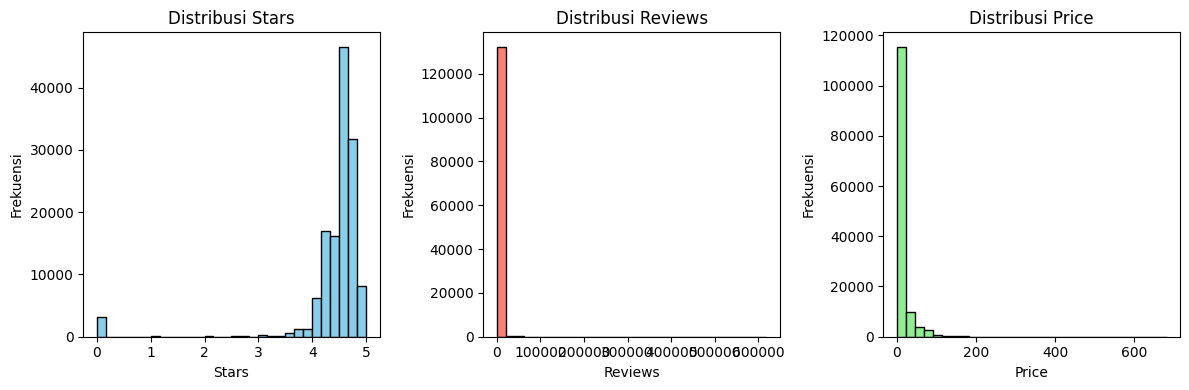

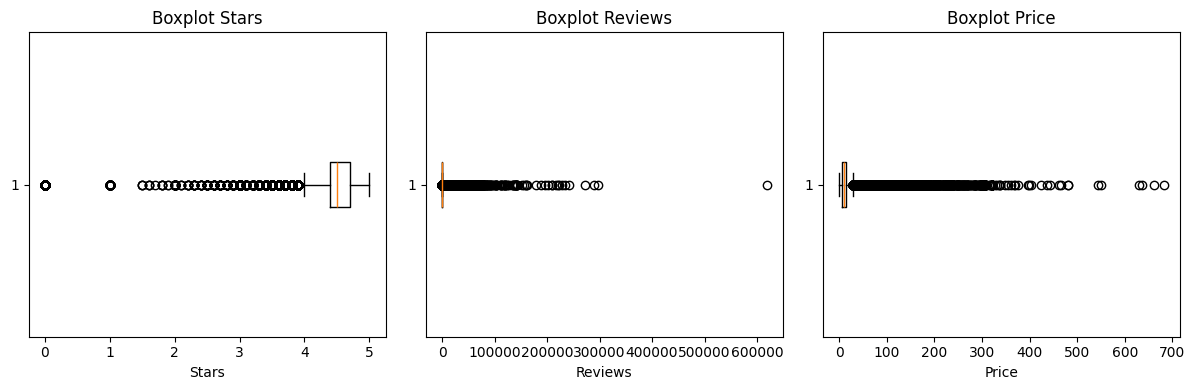

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Misalkan df adalah DataFrame kamu
# df = pd.read_csv('path_to_your_dataset.csv')  # Load your dataset

# Membuat Histogram
plt.figure(figsize=(12, 4))

# Histogram untuk Stars
plt.subplot(1, 3, 1)
plt.hist(df['stars'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Stars')
plt.xlabel('Stars')
plt.ylabel('Frekuensi')

# Histogram untuk Reviews
plt.subplot(1, 3, 2)
plt.hist(df['reviews'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribusi Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frekuensi')

# Histogram untuk Price
plt.subplot(1, 3, 3)
plt.hist(df['price'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribusi Price')
plt.xlabel('Price')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Membuat Boxplot
plt.figure(figsize=(12, 4))

# Boxplot untuk Stars
plt.subplot(1, 3, 1)
plt.boxplot(df['stars'], vert=False)
plt.title('Boxplot Stars')
plt.xlabel('Stars')

# Boxplot untuk Reviews
plt.subplot(1, 3, 2)
plt.boxplot(df['reviews'], vert=False)
plt.title('Boxplot Reviews')
plt.xlabel('Reviews')

# Boxplot untuk Price
plt.subplot(1, 3, 3)
plt.boxplot(df['price'], vert=False)
plt.title('Boxplot Price')
plt.xlabel('Price')

plt.tight_layout()
plt.show()


- **Keputusan tentang Rating**: 
  - Memutuskan untuk **menyimpan baris dengan rating 0** meskipun menunjukkan kualitas yang sangat rendah. Hal ini memungkinkan analisis yang lebih komprehensif dan pemahaman tentang buku-buku yang mungkin memiliki potensi namun belum mendapatkan perhatian.

- **Keputusan tentang Ulasan**:
  - Mengadopsi pendekatan konservatif dengan **menghapus baris yang memiliki ulasan di bawah 10**. Dengan demikian, hanya buku-buku dengan ulasan yang lebih signifikan yang akan dianalisis, memastikan bahwa data yang digunakan lebih representatif dan relevan.

- **Keputusan tentang Harga**
  - Data harga juga diputuskan untuk tidak dihapus. Mempertahankan informasi harga adalah penting untuk menganalisis bagaimana harga berpengaruh terhadap rating dan ulasan, serta untuk melihat apakah ada pola tertentu yang muncul antara harga dan kualitas produk.

- **Tujuan Analisis**:
  - Langkah ini diambil untuk meningkatkan kualitas analisis dan fokus pada buku-buku yang lebih mampu mencerminkan preferensi dan kebiasaan pembaca secara lebih akurat.


## D. Data Cleaning

### Removing Unnecessary Columns

In [382]:
# Hapus kolom yang tidak diperlukan
df = df.drop(columns=['asin', 'imgUrl', 'productURL', 'category_id', 'stars', 'isKindleUnlimited'])

Menghapus kolom2 yang tidak dipakai pada analisis ini

### Data Type Correction

In [269]:
# Ubah 'publishedDate' menjadi tipe datetime
df['publishedDate'] = pd.to_datetime(df['publishedDate'], errors='coerce')

mengganti data type agar bisa digunakan dengan baik di analisis ini

### Handle Missing Value

In [270]:
#Hapus baris dengan missing value di kolom author, soldBy, dan publishedDate
df = df.dropna(subset=['author', 'soldBy', 'publishedDate'])

menghapus data yang kosong agar analisis memiliki data yang konsisten

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64972 entries, 0 to 133101
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              64972 non-null  object        
 1   author             64972 non-null  object        
 2   soldBy             64972 non-null  object        
 3   reviews            64972 non-null  int64         
 4   price              64972 non-null  float64       
 5   isBestSeller       64972 non-null  bool          
 6   isEditorsPick      64972 non-null  bool          
 7   isGoodReadsChoice  64972 non-null  bool          
 8   publishedDate      64972 non-null  datetime64[ns]
 9   category_name      64972 non-null  object        
 10  tag                64972 non-null  object        
dtypes: bool(3), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 4.6+ MB


berikut hasil yang sudah bersih tidak ada lagi missing value, dan siap untuk digunakan untuk analisis ini

## E. Analisis Dan Perhitungan

### 1. Bagaimana distribusi jumlah review untuk setiap tag ? 

Menggunakan teknik ini untuk menjawab pertanyaan tentang distribusi jumlah review berdasarkan kategori tag sangat efektif karena memungkinkan Saya mengelompokkan data dengan jelas, menghasilkan statistik deskriptif yang memberikan wawasan mendalam tentang sebaran data. Dengan mendefinisikan kategori tag (BestSeller, EditorsPick, GoodReadsChoice, dan Non-Tag) dan menggunakan fungsi describe(), Saya bisa mendapatkan informasi penting seperti rata-rata, maksimum, dan kuartil. Ini membantu dalam mengidentifikasi pola, tren, dan perbandingan antar kategori, serta menjadi dasar untuk analisis lebih lanjut.

In [406]:
# Menentukan kategori tag
df['tag'] = 'Non-Tag'
df.loc[df['isBestSeller'], 'tag'] = 'BestSeller'
df.loc[df['isEditorsPick'], 'tag'] = 'EditorsPick'
df.loc[df['isGoodReadsChoice'], 'tag'] = 'GoodReadsChoice'

# Menghitung deskripsi statistik untuk jumlah review berdasarkan tag
review_stats_by_tag = df.groupby('tag')['reviews'].describe()

# Menampilkan hasil
review_stats_by_tag

,count,mean,std,min,25%,50%,75%,max
tag,,,,,,,,
BestSeller,1139.0,1362.194908,6147.086626,0.0,0.0,13.0,415.5,133015.0
EditorsPick,3524.0,3485.581725,18052.310720,0.0,0.0,166.0,1311.5,618227.0
GoodReadsChoice,567.0,8054.148148,21656.846719,0.0,0.0,1341.0,6015.0,227722.0
Non-Tag,59742.0,357.175639,2311.288067,0.0,0.0,0.0,120.0,187920.0



Analisis distribusi jumlah review berdasarkan kategori tag dapat dilakukan dengan mempertimbangkan statistik deskriptif berikut:

- BestSeller:

Jumlah Data: 1.139 review
Rata-Rata: 1.362,19 review, menunjukkan bahwa rata-rata review untuk produk yang termasuk dalam kategori BestSeller cukup rendah dibandingkan dengan kategori lain.
Standar Deviasi: 6.147,09, yang menunjukkan variabilitas yang tinggi dalam jumlah review, dengan beberapa produk menerima banyak review.
Minimum: 0 review, menunjukkan bahwa ada produk BestSeller yang belum menerima review.
Maksimum: 133.015 review, menunjukkan adanya produk yang sangat populer di kategori ini.

- EditorsPick:

Jumlah Data: 3.524 review
Rata-Rata: 3.485,58 review, yang menunjukkan bahwa produk yang dipilih oleh editor cenderung memiliki jumlah review yang lebih tinggi dibandingkan BestSeller.
Standar Deviasi: 18.052,31, menunjukkan variabilitas yang sangat besar. Beberapa produk di kategori ini mendapatkan sangat banyak review.
Minimum: 0 review, sama seperti BestSeller, ada produk EditorsPick yang tidak mendapatkan review.
Maksimum: 618.227 review, menandakan ada produk yang sangat sukses di kategori ini.

- GoodReadsChoice:

Jumlah Data: 567 review
Rata-Rata: 8.054,15 review, yang merupakan jumlah tertinggi dibandingkan dengan ketiga kategori lainnya, menunjukkan bahwa produk dalam kategori ini sangat diminati.
Standar Deviasi: 21.656,85, menunjukkan variabilitas yang sangat tinggi. Produk dalam kategori ini bisa sangat populer atau kurang mendapatkan perhatian.
Minimum: 0 review, menunjukkan ada produk yang tidak mendapatkan review.
Maksimum: 227.722 review, mengindikasikan adanya produk yang sangat berhasil di kategori ini.

- Non-Tag:

Jumlah Data: 59.742 review
Rata-Rata: 357,18 review, menunjukkan bahwa produk yang tidak termasuk dalam kategori premium cenderung mendapatkan sedikit review.
Standar Deviasi: 2.311,29, menunjukkan variasi yang lebih kecil dibandingkan dengan kategori lain.
Minimum: 0 review, ada produk Non-Tag yang tidak mendapatkan review.
Maksimum: 187.920 review, menunjukkan adanya produk yang cukup sukses meskipun tidak termasuk dalam kategori premium.
Dari analisis ini, dapat disimpulkan bahwa kategori GoodReadsChoice memiliki rata-rata jumlah review tertinggi, menunjukkan popularitas yang lebih besar di antara pembaca. Sementara itu, EditorsPick memiliki jumlah data yang lebih banyak, yang menunjukkan bahwa produk dalam kategori ini juga banyak mendapatkan perhatian. Di sisi lain, kategori Non-Tag memiliki jumlah review yang jauh lebih rendah secara rata-rata, yang mungkin menunjukkan kurangnya daya tarik dibandingkan dengan kategori premium. Variabilitas yang tinggi di semua kategori menunjukkan bahwa ada produk yang sangat populer dan beberapa yang tidak mendapatkan perhatian sama sekali.

### 2. Apakah terdapat korelasi antara tag dan jumlah review?

Menggunakan ANOVA dalam analisis ini bermanfaat untuk memahami apakah ada korelasi antara kategori tag dan jumlah review yang diterima. ANOVA memungkinkan kita untuk membandingkan rata-rata jumlah review di beberapa kelompok (dalam hal ini, tag) secara simultan. Dengan menganalisis variabilitas antara dan dalam kelompok, kita dapat mengidentifikasi apakah perbedaan jumlah review yang signifikan antara tag-tag yang berbeda menunjukkan adanya hubungan atau pola tertentu, yang dapat memberikan wawasan tentang preferensi pengguna berdasarkan tag yang ada.

In [407]:
# Melakukan ANOVA untuk jumlah review berdasarkan tag
reviews_groups = [
    group['reviews'].values for name, group in df.groupby('isBestSeller')
] + [
    group['reviews'].values for name, group in df.groupby('isEditorsPick')
] + [
    group['reviews'].values for name, group in df.groupby('isGoodReadsChoice')
]

f_stat_reviews, p_value_reviews = stats.f_oneway(*reviews_groups)


print("\nANOVA untuk Jumlah Ulasan:")
print("P-value:", p_value_reviews)

# Hipotesis
print("\nHipotesis:")
print("H0: Tidak ada korelasi antara tag dengan jumlah review.")
print("H1: Ada korelasi antara tag dengan jumlah review.")



ANOVA untuk Jumlah Ulasan:
P-value: 0.0

Hipotesis:
H0: Tidak ada korelasi antara tag dengan jumlah review.
H1: Ada korelasi antara tag dengan jumlah review.


Hasil ANOVA dengan P-value sebesar 0.0 menunjukkan bahwa kita harus menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1). Hipotesis nol menyatakan bahwa tidak ada korelasi antara kategori tag dan jumlah review, sedangkan hipotesis alternatif menyatakan bahwa ada korelasi antara kategori tag dan jumlah review. Dengan P-value yang sangat kecil, ini mengindikasikan bahwa perbedaan dalam jumlah review berdasarkan kategori tag sangat signifikan, menandakan bahwa tag memang berpengaruh terhadap jumlah review yang diterima.

### 3. Genre mana yang paling diminati berdasarkan jumlah review di setiap tag?

Saya memilih pie chart untuk menjelaskan distribusi jumlah review berdasarkan genre karena visualisasi ini efektif dalam menunjukkan proporsi setiap genre terhadap total review di setiap tag. Pie chart memudahkan perbandingan antara genre dengan jelas, sehingga pembaca dapat dengan cepat memahami kontribusi masing-masing genre tanpa harus menganalisis angka secara mendetail. Selain itu, kesederhanaan pie chart menjadikannya mudah dipahami oleh berbagai audiens, menjadikan informasi lebih jelas dan menarik.

In [411]:
# Menentukan kategori tag
df['tag'] = 'Non-Tag'
df.loc[df['isBestSeller'], 'tag'] = 'BestSeller'
df.loc[df['isEditorsPick'], 'tag'] = 'EditorsPick'
df.loc[df['isGoodReadsChoice'], 'tag'] = 'GoodReadsChoice'

# Menghitung total jumlah review untuk setiap genre di setiap tag
genre_review_summary = df.groupby(['tag', 'category_name'])['reviews'].sum().reset_index()

# Mengambil top 5 genre dengan jumlah review terbanyak untuk setiap tag
top_5_genre_reviews = genre_review_summary.groupby('tag', as_index=False).apply(lambda x: x.nlargest(5, 'reviews')).reset_index(drop=True)

# Plotting pie chart untuk komposisi top 5 genre berdasarkan jumlah review
fig_pie = px.pie(
    top_5_genre_reviews,
    values='reviews',
    names='category_name',
    title='Top 5 Genre dengan Jumlah Review Terbanyak di Setiap Tag',
    color='category_name',  # Membedakan warna berdasarkan genre
    template='plotly_white',
    facet_col='tag'  # Memisahkan pie chart untuk setiap tag
)

# Menampilkan pie chart
fig_pie.show()


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_14476\3612635612.py:11: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Hasil ini menunjukkan distribusi jumlah review berdasarkan genre untuk masing-masing tag (BestSeller, EditorsPick, GoodReadsChoice, dan Non-Tag). Berikut adalah analisis dari hasil tersebut:

- BestSeller:

Genre Literature & Fiction mendominasi dengan 407,556 review, menyumbang sekitar 26.27% dari total review untuk tag ini.
Biographies & Memoirs dan Religion & Spirituality juga memiliki kontribusi signifikan, masing-masing dengan 367,792 review (23.70%) dan 198,958 review (12.82%).
Genre-genre lain seperti Politics & Social Sciences dan Teen & Young Adult memiliki kontribusi yang lebih kecil, tetapi tetap menunjukkan ketertarikan di kalangan pembaca.

- EditorsPick:

Tag ini menunjukkan dominasi yang sangat kuat dari Literature & Fiction, yang memiliki 7,055,825 review, setara dengan 57.44% dari total review untuk tag ini. Ini menunjukkan bahwa genre ini sangat populer dan disukai oleh pembaca yang memilih buku yang direkomendasikan.
Genre Biographies & Memoirs juga menunjukkan kontribusi besar dengan 3,014,803 review (24.54%).
Genre lainnya seperti Teen & Young Adult dan Politics & Social Sciences memiliki kontribusi yang lebih kecil, tetapi tetap relevan.

- GoodReadsChoice:

Literature & Fiction kembali menunjukkan hasil luar biasa dengan 2,993,059 review (65.54%), yang menandakan preferensi pembaca untuk genre ini di antara buku yang dipilih oleh pengguna GoodReads.
Biographies & Memoirs dan Teen & Young Adult juga mendapat perhatian dengan masing-masing 743,060 review (16.27%) dan 315,305 review (6.90%).

- Non-Tag:

Genre Literature & Fiction juga mendominasi di kategori Non-Tag dengan 5,396,750 review (25.29%), menunjukkan popularitas yang konsisten.
Genre Biographies & Memoirs dan Religion & Spirituality juga memiliki kontribusi signifikan dengan 3,394,644 review (15.91%) dan 2,415,464 review (11.32%).
Hasil ini secara keseluruhan menunjukkan bahwa Literature & Fiction adalah genre yang paling populer di semua tag, sementara Biographies & Memoirs juga memiliki kontribusi yang signifikan. Dalam pie chart Saya, Saya dapat menggunakan data ini untuk menyoroti proporsi masing-masing genre dalam konteks tag yang berbeda, memberikan gambaran yang jelas mengenai preferensi pembaca dalam setiap kategori. Visualisasi ini membantu mengidentifikasi genre mana yang paling banyak diminati oleh pembaca untuk masing-masing tag, serta menunjukkan tren yang jelas dalam preferensi genre.

### 4. Tag mana yang paling berpengaruh berdasarkan jumlah review?

Saya menggunakan bar chart untuk menjawab pertanyaan ini karena chart ini secara efektif menggambarkan perbandingan jumlah review antar kategori tag. Dengan bar chart, perbedaan ukuran setiap kategori dapat dilihat dengan jelas, memudahkan analisis visual tentang seberapa banyak masing-masing tag berkontribusi terhadap total jumlah review. Selain itu, bar chart memungkinkan pemirsa untuk dengan cepat memahami hierarki dan prioritas antara kategori, yang penting dalam mengevaluasi dampak berbagai tag terhadap interaksi pembaca. Dengan informasi ini, saya dapat menyampaikan insights yang lebih mendalam mengenai bagaimana tag-tag tersebut berpengaruh terhadap jumlah review yang diterima.

In [413]:
# Menghitung jumlah review berdasarkan tag
tag_review_counts = df.groupby(
    ['isBestSeller', 'isEditorsPick', 'isGoodReadsChoice']
).agg(total_reviews=('reviews', 'sum')).reset_index()

# Menyusun data untuk visualisasi
tag_review_counts['tag'] = 'Non-Tag'
tag_review_counts.loc[tag_review_counts['isBestSeller'], 'tag'] = 'BestSeller'
tag_review_counts.loc[tag_review_counts['isEditorsPick'], 'tag'] = 'EditorsPick'
tag_review_counts.loc[tag_review_counts['isGoodReadsChoice'], 'tag'] = 'GoodReadsChoice'

# Mengelompokkan berdasarkan tag dan jumlah review
tag_review_summary = tag_review_counts.groupby('tag')['total_reviews'].sum().reset_index()

# Mengurutkan jumlah review dari yang tertinggi ke terendah
tag_review_summary = tag_review_summary.sort_values(by='total_reviews', ascending=False)

# Plotting menggunakan Plotly
fig = px.bar(tag_review_summary, 
             x='tag', 
             y='total_reviews', 
             title='Jumlah Review berdasarkan Tag',
             labels={'total_reviews': 'Jumlah Review', 'tag': 'Tag'})

# Menampilkan chart
fig.show()


Hasil analisis menunjukkan bahwa kategori "Non-Tag" memiliki jumlah review tertinggi dengan total 21,338,387, diikuti oleh "EditorsPick" dengan 12,283,190. Kategori "GoodReadsChoice" dan "BestSeller" memiliki jumlah review yang jauh lebih rendah, masing-masing 4,566,702 dan 1,551,540. Ini menunjukkan bahwa buku-buku yang tidak diberi label premium mendapatkan perhatian yang lebih besar dari pembaca, yang mungkin mencerminkan preferensi pasar yang lebih luas atau keberadaan buku-buku populer yang tidak terdaftar dalam kategori premium. Meskipun kategori seperti "EditorsPick" dan "GoodReadsChoice" memiliki jumlah review yang signifikan, angka tersebut masih jauh lebih rendah dibandingkan dengan "Non-Tag", menandakan bahwa label premium mungkin tidak selalu berpengaruh pada jumlah ulasan yang diterima. Ini dapat membuka diskusi lebih lanjut tentang efektivitas tag dalam menarik perhatian pembaca dan dampaknya terhadap penjualan atau popularitas buku.

### 5. Genre mana yang paling banyak dibaca berdasarkan jumlah review di tahun 2023?

Bar chart dipilih untuk menjawab pertanyaan ini karena kemampuannya yang efektif dalam membandingkan jumlah review antar berbagai genre secara visual. Dengan menggunakan bar chart, kita dapat dengan jelas melihat perbedaan signifikan dalam jumlah review antara genre-genre yang berbeda, yang membuat informasi lebih mudah dipahami dan mendorong analisis yang lebih cepat. Struktur vertikal atau horizontal dari bar chart juga memungkinkan pembaca untuk dengan mudah mengidentifikasi genre mana yang paling banyak dibaca serta peringkatnya, sehingga memperjelas distribusi popularitas setiap genre di tahun 2023.

In [416]:
# Menghitung jumlah review per genre untuk tahun 2023
genre_review_2023 = df[df['publishedDate'].dt.year == 2023].groupby('category_name')['reviews'].sum().reset_index()

# Mengurutkan berdasarkan jumlah review dari yang tertinggi ke terendah
genre_review_2023 = genre_review_2023.sort_values(by='reviews', ascending=False)

# Plotting menggunakan Plotly
fig = px.bar(genre_review_2023, 
             x='category_name', 
             y='reviews', 
             title='Jumlah Review per Genre di Tahun 2023',
             labels={'reviews': 'Jumlah Review', 'category_name': 'Genre'},
             text='reviews')

# Menampilkan chart
fig.show()


Hasil analisis menunjukkan bahwa genre "Literature & Fiction" mendominasi jumlah review di tahun 2023 dengan total 1.433.060 review, yang jauh lebih tinggi dibandingkan genre lainnya. "Biographies & Memoirs" mengikuti di posisi kedua dengan 359.807 review, diikuti oleh "Politics & Social Sciences" dengan 243.223 review. Genre seperti "Teen & Young Adult" dan "Religion & Spirituality" juga menunjukkan minat yang signifikan dengan masing-masing 201.207 dan 148.895 review. Namun, sejumlah genre seperti "Health, Fitness & Dieting" dan "Business & Money" tidak memiliki review sama sekali, menandakan kurangnya perhatian atau popularitas di antara pembaca untuk tahun ini.

### 6. Bagaimana tren jumlah review untuk setiap tag?

Saya menggunakan line chart untuk menjawab pertanyaan tentang tren jumlah review untuk setiap tag karena chart ini sangat efektif dalam menunjukkan perubahan dan pola seiring waktu. Dengan line chart, kita dapat dengan jelas melihat fluktuasi jumlah review dari tahun ke tahun untuk masing-masing tag, yang membantu dalam memahami apakah suatu tag semakin populer atau mengalami penurunan. Line chart juga memungkinkan perbandingan yang mudah antara berbagai tag dalam satu visualisasi, sehingga kita bisa langsung mengidentifikasi tren yang berbeda dan membuat kesimpulan tentang bagaimana masing-masing tag berperforma dalam menarik perhatian pembaca sepanjang periode yang dianalisis.

In [418]:
# Menghitung jumlah review berdasarkan tahun dan tag
df['year'] = df['publishedDate'].dt.year  # Mengambil tahun dari tanggal publikasi
tag_trend = df.groupby(['year', 'tag'])['reviews'].sum().reset_index()

# Membuat plot tren dengan Plotly
fig_trend = px.line(tag_trend, 
                    x='year', 
                    y='reviews', 
                    color='tag', 
                    title='Tren Jumlah Review untuk Setiap Tag',
                    labels={'reviews': 'Jumlah Review', 'year': 'Tahun'})

# Menampilkan chart
fig_trend.show()


Hasil di atas menunjukkan jumlah total review untuk setiap tag dari tahun 2018 hingga 2023. Dari data tersebut, kita dapat melihat tren dan perbandingan antara tag BestSeller, EditorsPick, GoodReadsChoice, dan Non-Tag selama enam tahun terakhir.

- BestSeller menunjukkan fluktuasi jumlah review dari 116.464 di tahun 2018 hingga 202.457 di tahun 2023, dengan puncaknya terjadi pada tahun 2019 (269.248 review) dan penurunan di tahun 2020.
- EditorsPick menunjukkan tren yang lebih stabil dan tinggi, dengan jumlah review yang mencapai 1.831.394 di tahun 2018 dan mengalami sedikit penurunan ke 630.561 di tahun 2023, tetapi tetap menjadi tag dengan jumlah review tertinggi setiap tahunnya.
- GoodReadsChoice menunjukkan jumlah review yang lebih rendah dibandingkan dengan tag lainnya, dengan puncaknya pada tahun 2020 (820.501 review) dan turun tajam di tahun 2023 (35.845 review).
- Non-Tag selalu mendominasi jumlah review, menunjukkan tren yang relatif stabil dari 2.006.977 di tahun 2018 hingga 2.085.524 di tahun 2023, dengan penurunan kecil di tahun 2022 sebelum meningkat kembali di tahun 2023.
Secara keseluruhan, data ini memberikan wawasan yang jelas mengenai bagaimana jumlah review berfluktuasi dan menunjukkan bahwa tag EditorsPick dan Non-Tag secara konsisten menarik lebih banyak perhatian pembaca dibandingkan dengan tag lainnya. Ini menjadi dasar penting untuk memahami tren pembaca dan bagaimana tag mempengaruhi popularitas buku.

## **Kesimpulan Analisis Keseluruhan**

Berdasarkan enam pertanyaan yang telah dianalisis, berikut adalah kesimpulan yang dapat diambil mengenai performa buku berdasarkan **tag** dan **genre**:

- **Dominasi Genre**: Genre **"Literature & Fiction"** menunjukkan jumlah review tertinggi, menandakan ketertarikan yang kuat dari pembaca, sedangkan genre lain memiliki jumlah yang jauh lebih rendah.
  
- **Tren Penjualan Tag**: Buku tanpa tag (**Non-Tag**) konsisten memiliki jumlah review yang jauh lebih tinggi dibandingkan buku dengan **tag premium** seperti **BestSeller**, **EditorsPick**, dan **GoodReadsChoice**, menunjukkan potensi pasar yang belum sepenuhnya dimanfaatkan untuk buku dengan tag tersebut.
  
- **Peningkatan Tag**: Buku dengan tag **EditorsPick** dan **GoodReadsChoice** menunjukkan potensi untuk menarik perhatian pembaca, tetapi **BestSeller** perlu strategi tambahan untuk meningkatkan performanya.
  
- **Tren Waktu**: Selama periode 2018 hingga 2023, tren jumlah review untuk tag premium menunjukkan fluktuasi, di mana tag **EditorsPick** tetap menjadi yang paling banyak dibaca meskipun jumlahnya menurun di tahun 2023.

## **Masukan untuk Tim Publisher dan Marketing**

Berdasarkan hasil analisis di atas, berikut adalah rekomendasi untuk tim publisher dan marketing:

1. **Promosikan Buku dengan Tag Premium**: Tingkatkan fokus pada buku dengan tag **EditorsPick** dan **GoodReadsChoice** dalam kampanye pemasaran, dengan menonjolkan alasan di balik pemilihan tag tersebut.

2. **Kampanye untuk Genre Populer**: Mengingat popularitas genre **"Literature & Fiction"**, tim marketing sebaiknya merancang kampanye yang menarik untuk genre ini, mungkin dengan mengadakan acara penandatanganan buku atau diskusi online.

3. **Pendekatan pada Non-Tag**: Analisis lebih lanjut diperlukan untuk memahami faktor yang membuat buku tanpa tag lebih populer, dan bagaimana bisa menerapkan beberapa strategi yang sama pada buku dengan tag.

4. **Monitoring dan Analisis Tren**: Secara berkala lakukan analisis terhadap tren penjualan dan jumlah review untuk menyesuaikan strategi pemasaran. Pastikan untuk mengevaluasi kampanye sebelumnya untuk memahami efektivitasnya.

5. **Mengembangkan Konten Edukasi**: Berikan informasi mendalam melalui konten marketing, seperti blog atau video, mengenai buku-buku dengan tag premium dan kenapa pembaca harus memilihnya.

6. **Kolaborasi dengan Pembaca dan Influencer**: Ajak pembaca untuk terlibat dalam promosi buku dengan tag premium dan pertimbangkan untuk bekerja sama dengan influencer yang relevan untuk meningkatkan visibilitas.

Dengan mengikuti rekomendasi ini, diharapkan tim publisher dan marketing dapat meningkatkan daya tarik dan performa buku di pasar.
